In [126]:
import numpy as np
import pandas as pd 

In [127]:
train = pd.read_csv("D://great learning//ensamble//INDIA ML//train_u5jK80M//train.csv")

In [128]:
test = pd.read_csv("D://great learning//ensamble//INDIA ML//test_UspLgmQ//test.csv")

In [129]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [130]:
test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,0,0,0,0,0,0


In [131]:
train.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [132]:
test.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
dtype: int64

In [133]:
train.shape  # SHAPE IS USED TO DESCRIBE THE  NUMBER OF COLUMNS AND ROWS 

(116058, 29)

In [134]:
test.shape

(35866, 28)

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [136]:
train.describe()  # describe function shows the statistical analysis of the Data.

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [137]:
import matplotlib.pyplot as plt

In [138]:
import seaborn as sns

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


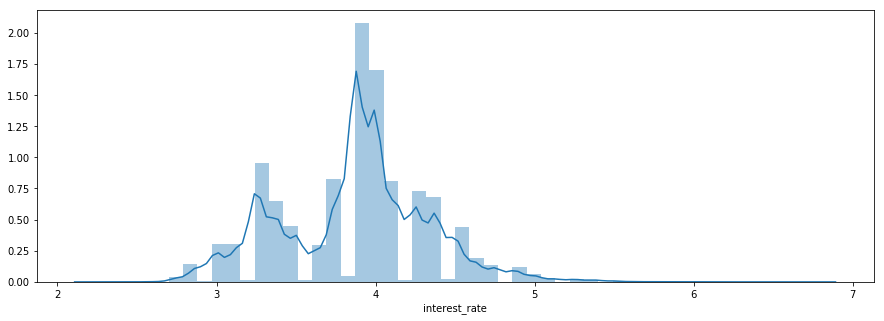

In [139]:
plt.figure(figsize=[15,5])
sns.distplot(train.interest_rate)  # most of the interest rates are lies in 3 to 5 .

In [140]:
train.source.value_counts()  # This means persons getting the loans from 3 source's

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

In [141]:
train.corr() # showing the corelation of all numerical variables

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
loan_id,1.000000,-0.000902,0.005385,-0.001277,0.000761,0.001739,0.003894,0.001230,0.000948,0.001919,...,-0.007563,-0.005626,-0.005968,-0.006668,-0.002793,-0.003849,-0.002362,-0.004116,-0.003572,-0.002982
interest_rate,-0.000902,1.000000,-0.002854,0.720734,0.273379,-0.128075,0.181988,-0.210468,0.143116,-0.138013,...,0.030543,0.035726,0.034311,0.032133,0.035393,0.035841,0.037994,0.037051,0.039708,0.054298
unpaid_principal_bal,0.005385,-0.002854,1.000000,0.192168,0.062447,0.130565,0.073415,0.052061,0.010926,0.132632,...,-0.010344,-0.011461,-0.007814,-0.008912,-0.009228,-0.008983,-0.005866,-0.006412,-0.008254,-0.017120
loan_term,-0.001277,0.720734,0.192168,1.000000,0.292565,-0.107341,0.137852,-0.072021,0.190762,-0.110268,...,0.011688,0.013645,0.011622,0.011406,0.012954,0.014031,0.015510,0.014814,0.015773,0.023502
loan_to_value,0.000761,0.273379,0.062447,0.292565,1.000000,-0.100898,0.126993,-0.142574,0.490128,-0.109546,...,0.009826,0.006928,0.010560,0.010243,0.009938,0.008775,0.011103,0.010856,0.010811,0.016357
number_of_borrowers,0.001739,-0.128075,0.130565,-0.107341,-0.100898,1.000000,-0.134395,0.120120,-0.058976,0.996498,...,-0.023442,-0.024665,-0.022337,-0.023716,-0.027472,-0.028033,-0.025946,-0.027608,-0.029661,-0.039979
debt_to_income_ratio,0.003894,0.181988,0.073415,0.137852,0.126993,-0.134395,1.000000,-0.184406,0.066946,-0.145145,...,0.015444,0.020784,0.021242,0.021904,0.025402,0.022836,0.024310,0.025467,0.024697,0.038033
borrower_credit_score,0.001230,-0.210468,0.052061,-0.072021,-0.142574,0.120120,-0.184406,1.000000,-0.062849,0.153952,...,-0.057269,-0.066448,-0.063116,-0.064656,-0.063057,-0.062565,-0.062256,-0.061407,-0.063148,-0.094215
insurance_percent,0.000948,0.143116,0.010926,0.190762,0.490128,-0.058976,0.066946,-0.062849,1.000000,-0.063370,...,-0.000735,-0.003598,-0.001315,-0.003097,-0.001997,-0.002225,-0.000652,-0.000102,0.000598,0.005722
co-borrower_credit_score,0.001919,-0.138013,0.132632,-0.110268,-0.109546,0.996498,-0.145145,0.153952,-0.063370,1.000000,...,-0.024716,-0.026393,-0.024080,-0.025423,-0.028770,-0.029218,-0.027354,-0.028930,-0.030878,-0.042651


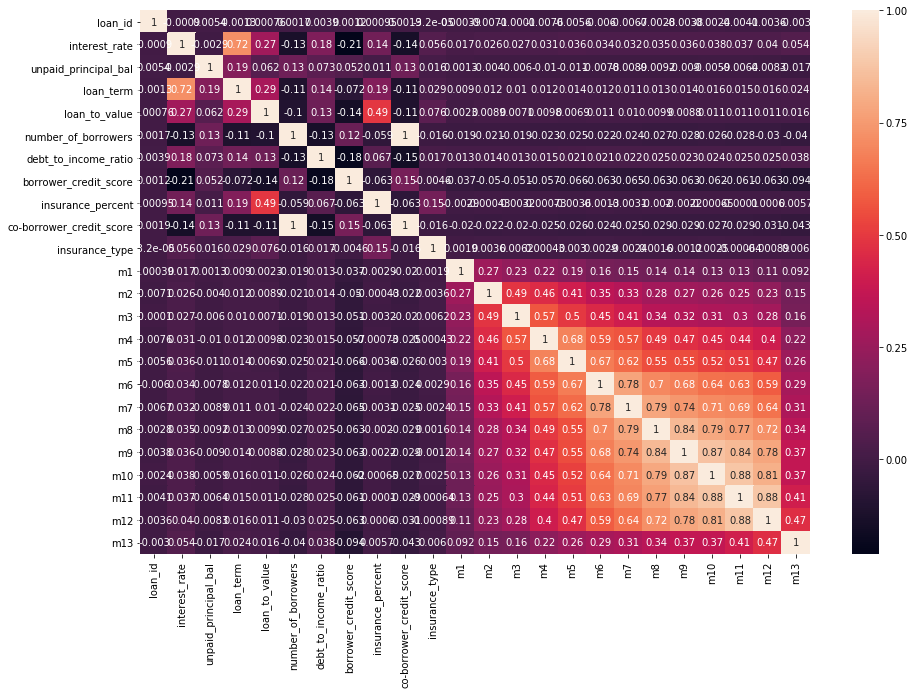

In [142]:
plt.figure(figsize=[15,10])
sns.heatmap(train.corr() , annot = True)

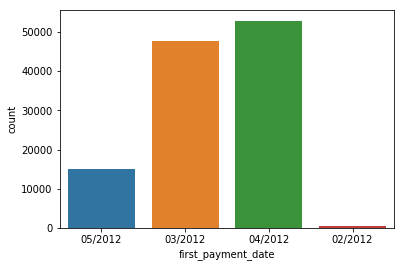

In [143]:
sns.countplot(train.first_payment_date)  # 04/2012 for first payment day for most of the customers

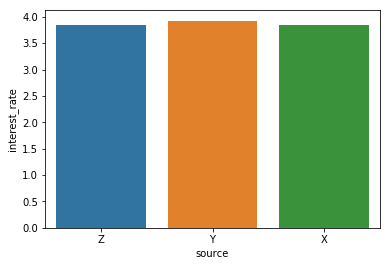

In [144]:
sns.barplot(x = "source",y = "interest_rate", data  = train)

In [145]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [146]:
train.loan_purpose.value_counts()

A23    58462
B12    29383
C86    28213
Name: loan_purpose, dtype: int64

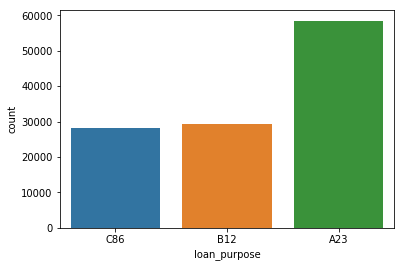

In [147]:
sns.countplot(train.loan_purpose)  # A23 has higest value 

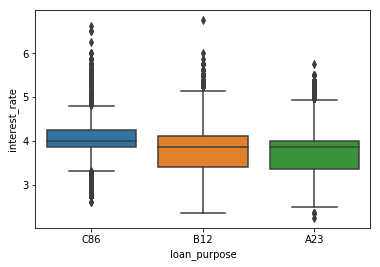

In [148]:

sns.boxplot(x = "loan_purpose" , y = "interest_rate" , data = train)

In [149]:
train.columns # remove 

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

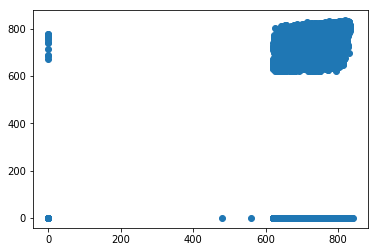

In [25]:
plt.scatter(x = "borrower_credit_score" , y = 'co-borrower_credit_score', data = train)

In [26]:
train.financial_institution.value_counts()

OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64

Text(0, 0.5, 'Financial Institution ')

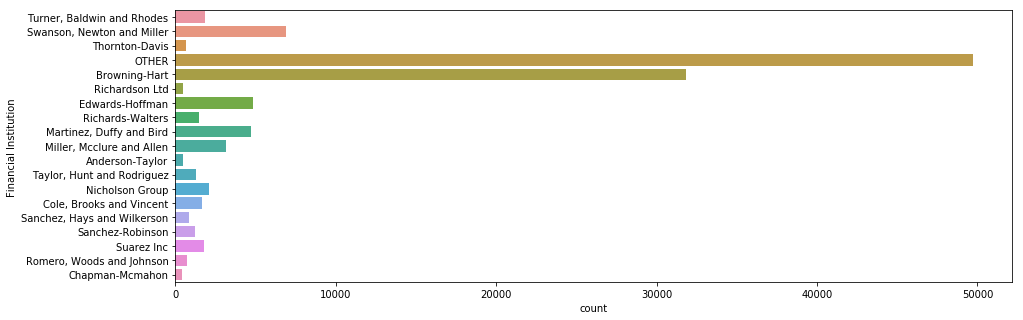

In [150]:
plt.figure(figsize=[15,5]),
sns.countplot(y = train.financial_institution) # Browning-hart has 2nd higest financial institution
plt.ylabel("Financial Institution ")

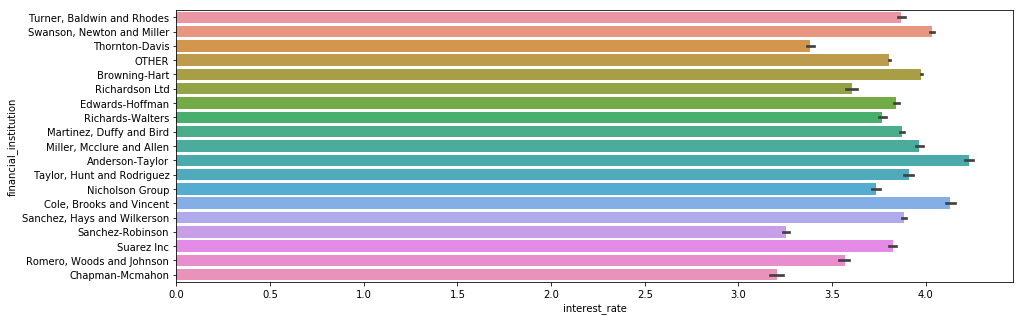

In [151]:
plt.figure(figsize=[15,5])
sns.barplot(y ="financial_institution" , x = "interest_rate" , data = train)

In [155]:
newtrain.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13'],
      dtype='object')

In [29]:
# by observing the Above the Above graph most of the instutions interest rates are lies in 3.0 to 4.0

In [152]:
train.loan_to_value.describe()

count    116058.000000
mean         67.431939
std          17.291719
min           6.000000
25%          57.000000
50%          72.000000
75%          80.000000
max          97.000000
Name: loan_to_value, dtype: float64

In [153]:
train.pivot_table

<bound method DataFrame.pivot_table of              loan_id source       financial_institution  interest_rate  \
0       268055008619      Z  Turner, Baldwin and Rhodes          4.250   
1       672831657627      Y  Swanson, Newton and Miller          4.875   
2       742515242108      Z              Thornton-Davis          3.250   
3       601385667462      X                       OTHER          4.750   
4       273870029961      X                       OTHER          4.750   
5       769060024464      Y               Browning-Hart          4.375   
6       148071614687      X                       OTHER          4.000   
7       853383953266      Y               Browning-Hart          4.500   
8       423590072335      X               Browning-Hart          4.000   
9       308990846816      X                       OTHER          4.000   
10      154855543213      X                       OTHER          4.125   
11      780643872178      X              Richardson Ltd          3.750   

In [154]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [33]:
train.source.value_counts()

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

In [60]:
newtrain = train.drop(['loan_id','source','financial_institution','origination_date','first_payment_date'],axis= 1)
newtest = test.drop(['loan_id','source','financial_institution','origination_date','first_payment_date'],axis= 1)

In [61]:
newtrain.shape

(116058, 24)

In [62]:
newtest.shape


(35866, 23)

In [101]:
ohe_train = pd.get_dummies(newtrain)

In [102]:
ohe_test = pd.get_dummies(newtest)

In [65]:
print(ohe_test.shape)
print(ohe_train.shape)

(35866, 25)
(116058, 26)


In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc = StandardScaler()

In [103]:
x = pd.DataFrame(sc.fit_transform(ohe_train.drop("m13",axis = 1)))

In [104]:
y = ohe_train.m13

In [105]:
scaled_test = pd.DataFrame(sc.fit_transform(ohe_test),columns = ohe_test.columns)

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
dtree = DecisionTreeClassifier()

In [108]:
dtree = DecisionTreeClassifier()

In [109]:
modal = dtree.fit(x,y)

In [110]:
pred = modal.predict(scaled_test)

In [111]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
sol = pd.DataFrame({"loan_id":test.loan_id,"m13":pred})

In [113]:
sol.head()

,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


  # finding out with the ensemble methods 

In [176]:
# WHAT IS ENSEMBLE METHODS : ENSEMBLE METHODS ARE COMBINE MORE ALGORUTHMS , WHICH IS USED TO REDUCE THE BIAS
# THE DIFFERENT ENSEMBLE MODELS ARE BAGGING AND BOOSTING
# BAGGING : BAGGING IS USED TO REDUCE THE BIAS
# BOOSTING : BOOSTING IS TO REDUCE THE VARIANCE.
# RANDOMFOREST : RANDOMFOREST IS WORKED BASED ON DECISIONTREE

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rf = RandomForestClassifier()

In [116]:
mod  = rf.fit(x,y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [117]:
predictions = mod.predict(scaled_test)

In [118]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
sol = pd.DataFrame({"loan_id":test.loan_id,"m13":predictions})

In [120]:
sol.head()

,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [125]:
rf.feature_importances_

array([0.06617245, 0.13517124, 0.02049967, 0.07234228, 0.007406  ,
       0.09175142, 0.11804337, 0.01258537, 0.03676117, 0.00149383,
       0.00568437, 0.00663325, 0.004039  , 0.00985718, 0.01466527,
       0.00786994, 0.01905982, 0.03366798, 0.03758366, 0.04484747,
       0.05942375, 0.16258835, 0.0098778 , 0.0101432 , 0.01183215])

In [166]:
# finding out with the voting

In [167]:
from sklearn.ensemble import VotingClassifier

In [169]:
vc = VotingClassifier(estimators=[("rf" , rf) , ("dtree" , dtree)])

In [170]:
modal = vc.fit(x,y)

In [171]:
pre = modal.predict(scaled_test)

In [172]:
pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [173]:
sol = pd.DataFrame({"loan_id":test.loan_id,"m13":pre})

In [174]:
sol.head()

,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [175]:
sol.to_csv("Voting.csv",index = False )